In [192]:
# Retail Sales Forecasting

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [227]:
features = pd.read_csv("/Users/anaghabhole/Downloads/archive-4/Features data set.csv")
sales =pd.read_csv("/Users/anaghabhole/Downloads/archive-4/sales data-set.csv")
stores = pd.read_csv("/Users/anaghabhole/Downloads/archive-4/stores data-set.csv")

# Data Cleaning and Preprocessing

In [228]:
stores.info()
features.info()
sales.info()

features.describe()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 1

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [229]:
# Preprocess the dataset
features = features.fillna(0)
label_encoder = LabelEncoder()
features['IsHoliday'] = label_encoder.fit_transform(features['IsHoliday'])
sales['IsHoliday'] = label_encoder.fit_transform(sales['IsHoliday'])
stores['Type'] = label_encoder.fit_transform(stores['Type'])
stores

,Store,Type,Size
0,1,0,151315
1,2,0,202307
2,3,1,37392
3,4,0,205863
4,5,1,34875
5,6,0,202505
6,7,1,70713
7,8,0,155078
8,9,1,125833
9,10,1,126512


In [230]:
sales_stores = pd.merge(sales, stores, on='Store')

In [231]:
data = pd.merge(sales_stores, features, on=['Store', 'Date', 'IsHoliday'])

In [232]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
1,1,2,05/02/2010,50605.27,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,1,3,05/02/2010,13740.12,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,1,4,05/02/2010,39954.04,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,1,5,05/02/2010,32229.38,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,26/10/2012,56017.47,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


# EDA

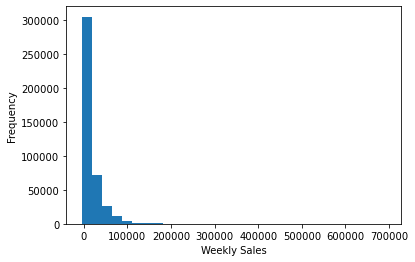

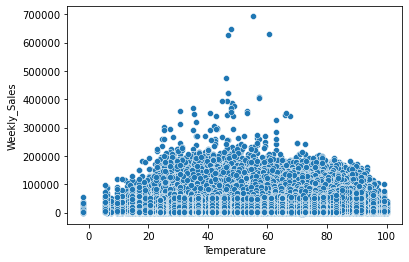

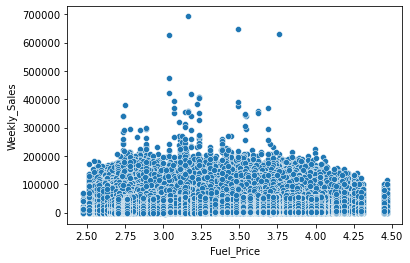

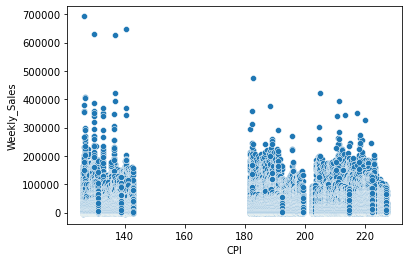

In [233]:
# Distribution of sales
plt.hist(data['Weekly_Sales'], bins=30)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Relationship between sales and temperature
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.show()

# Relationship between sales and fuel price
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.show()

# Relationship between sales and CPI
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.show()

In [234]:
# Mean sales by store
mean_sales_by_store = data.groupby('Store')['Weekly_Sales'].mean()
mean_sales_by_store

# Total sales by department and holiday week
total_sales_by_dept_holiday = data.groupby(['Dept', 'IsHoliday'])['Weekly_Sales'].sum()
total_sales_by_dept_holiday

Dept  IsHoliday
1     0            1.147716e+08
      1            8.867169e+06
2     0            2.616197e+08
      1            1.899147e+07
3     0            7.041132e+07
                       ...     
97    1            6.133824e+06
98    0            3.663728e+07
      1            3.191644e+06
99    0            2.388773e+05
      1            1.192726e+05
Name: Weekly_Sales, Length: 162, dtype: float64

<AxesSubplot:>

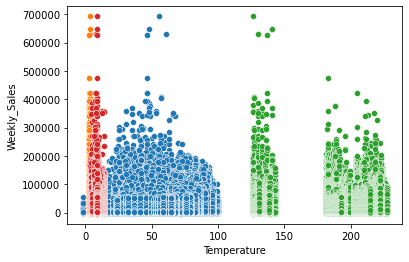

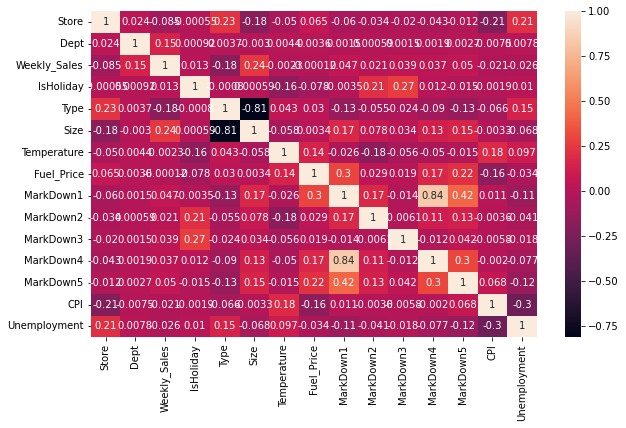

In [235]:
# Scatter plots
sns.scatterplot(data=data, x='Temperature', y='Weekly_Sales')
sns.scatterplot(data=data, x='Fuel_Price', y='Weekly_Sales')
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales')
sns.scatterplot(data=data, x='Unemployment', y='Weekly_Sales')

# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Type', ylabel='Size'>

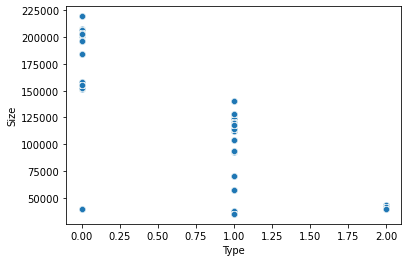

In [236]:
sns.scatterplot(data=data, x='Type', y='Size')

Original shape of the dataset: (421570, 16)
Total number of missing values:
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64
Total number of duplicate rows: 0


/Users/anaghabhole/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


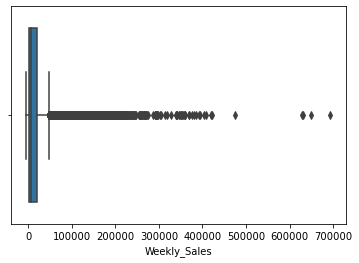

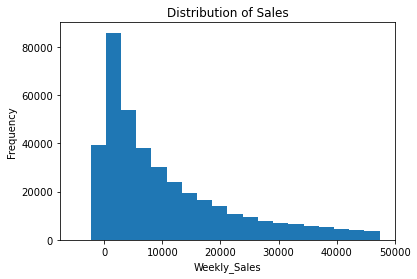

Final shape of the dataset: (386049, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
2,1,3,05/02/2010,13740.12,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
3,1,4,05/02/2010,39954.04,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
4,1,5,05/02/2010,32229.38,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
5,1,6,05/02/2010,5749.03,0,0,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421563,45,91,26/10/2012,16330.84,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421565,45,93,26/10/2012,2487.80,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,26/10/2012,5203.31,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,26/10/2012,6817.48,0,1,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [237]:

def clean_data(data):
    
    # Check the shape of the dataset
    print("Original shape of the dataset:", data.shape)
    
    # Check for missing values
    print("Total number of missing values:")
    print(data.isnull().sum())
    
    # Remove missing values
    data.dropna(inplace=True)
    
    # Check for duplicate values
    print("Total number of duplicate rows:", data.duplicated().sum())
    
    # Remove duplicate values
    data.drop_duplicates(inplace=True)
    
    # Check for outliers
    sns.boxplot(data['Weekly_Sales'])
    plt.show()
    
    # Remove outliers
    Q1 = data['Weekly_Sales'].quantile(0.25)
    Q3 = data['Weekly_Sales'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data['Weekly_Sales'] >= Q1 - 1.5*IQR) & (data['Weekly_Sales'] <= Q3 + 1.5*IQR)]
    
   # Visualize the cleaned data
    plt.hist(data['Weekly_Sales'], bins=20)
    plt.xlabel("Weekly_Sales")
    plt.ylabel("Frequency")
    plt.title("Distribution of Sales")
    plt.show()
    
    # Print the final shape of the cleaned dataset
    print("Final shape of the dataset:", data.shape)
    
    return data

clean_data(data)

In [238]:
#validate columns types 
data['Date']=pd.to_datetime(data['Date'])

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64
Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64
United States    9800
Name: Country, dtype: int64
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana

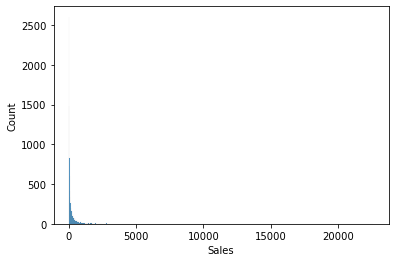

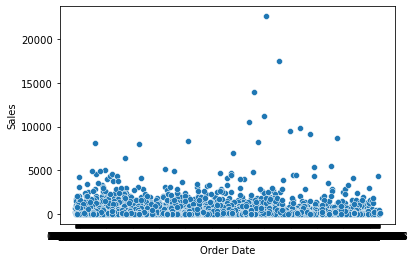

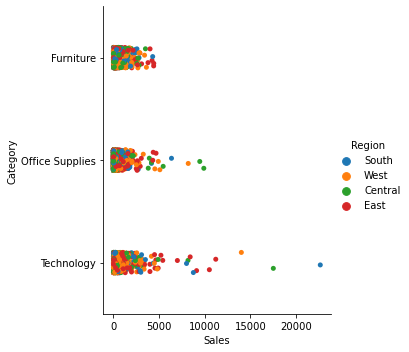

In [239]:
# Check the distribution of categorical variables
cat_vars = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for var in cat_vars:
    print(df[var].value_counts())

# Check the distribution of numerical variables
sns.histplot(df['Sales'])
plt.show()

# Check the relationship between variables
sns.scatterplot(data=df, x='Order Date', y='Sales')
plt.show()

sns.catplot(data=df, x='Sales', y='Category', hue='Region')
plt.show()

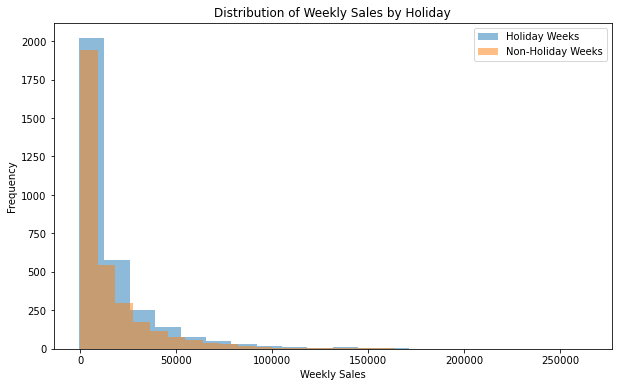

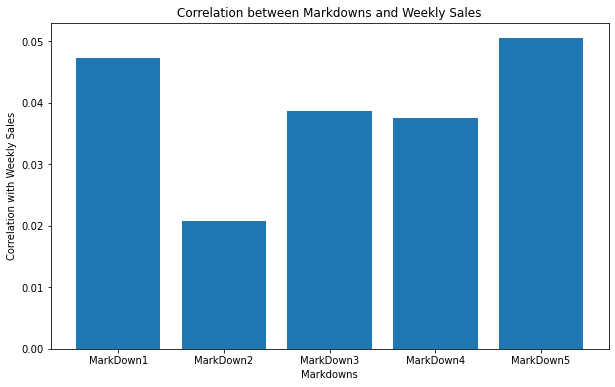

In [240]:
# Calculate the average weekly sales for each store and department
sales_data = data[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday']].groupby(['Store', 'Dept', 'IsHoliday']).mean().reset_index()

# Separate the sales data for holiday and non-holiday weeks
holiday_sales = sales_data[sales_data['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = sales_data[sales_data['IsHoliday'] == False]['Weekly_Sales']

# Plot the average weekly sales for holiday and non-holiday weeks
plt.figure(figsize=(10,6))
plt.hist(holiday_sales, bins=20, alpha=0.5, label='Holiday Weeks')
plt.hist(non_holiday_sales, bins=20, alpha=0.5, label='Non-Holiday Weeks')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales by Holiday')
plt.legend()
plt.show()

# Calculate the impact of markdowns on sales
markdown_impact = data[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Weekly_Sales']].corr()['Weekly_Sales'][:-1]

# Plot the correlation between markdowns and sales
plt.figure(figsize=(10,6))
plt.bar(markdown_impact.index, markdown_impact.values)
plt.xlabel('Markdowns')
plt.ylabel('Correlation with Weekly Sales')
plt.title('Correlation between Markdowns and Weekly Sales')
plt.show()


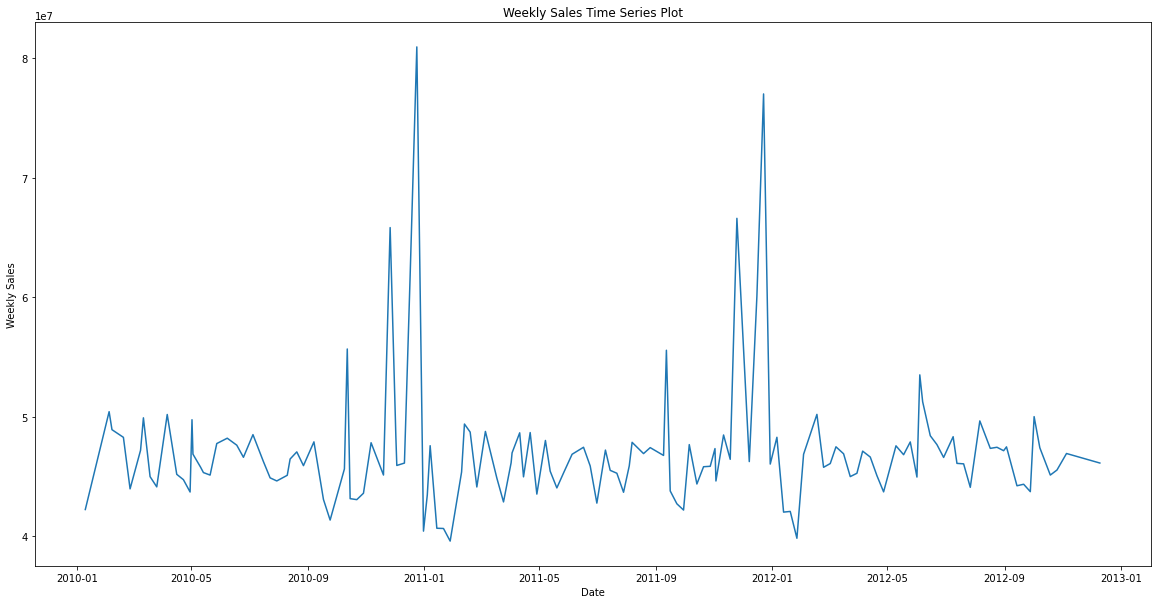

In [241]:
sales_by_date = data.groupby('Date')['Weekly_Sales'].sum()

# Plot the weekly sales as a time series plot
plt.figure(figsize=(20,10))
plt.plot(sales_by_date)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Time Series Plot')
plt.show()

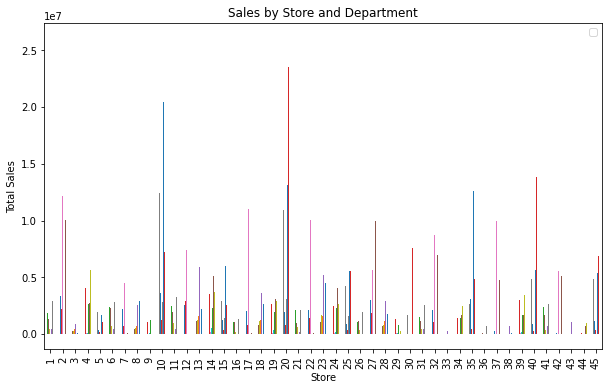

In [242]:
# Create a pivot table to summarize total sales by store and department
sales_pivot = pd.pivot_table(data, values='Weekly_Sales', index = 'Store', columns='Dept', aggfunc='sum')

# Plot a bar chart to compare sales across stores and departments
fig, ax = plt.subplots(figsize=(10, 6))
sales_pivot.plot(kind = 'bar', ax = ax)
ax.set_xlabel('Store')
ax.set_ylabel('Total Sales')
ax.set_title('Sales by Store and Department')
plt.legend(labels=[])
plt.show()


In [243]:
from sklearn.cluster import KMeans

# Select relevant features for clustering analysis
features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Subset data to include only relevant features
cluster_data = data[features]

# Normalize the data
normalized_data = (cluster_data - cluster_data.mean()) / cluster_data.std()

# Set number of clusters
num_clusters = 5

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters)

# Fit KMeans object to the data
kmeans.fit(normalized_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data
data['Cluster'] = cluster_labels

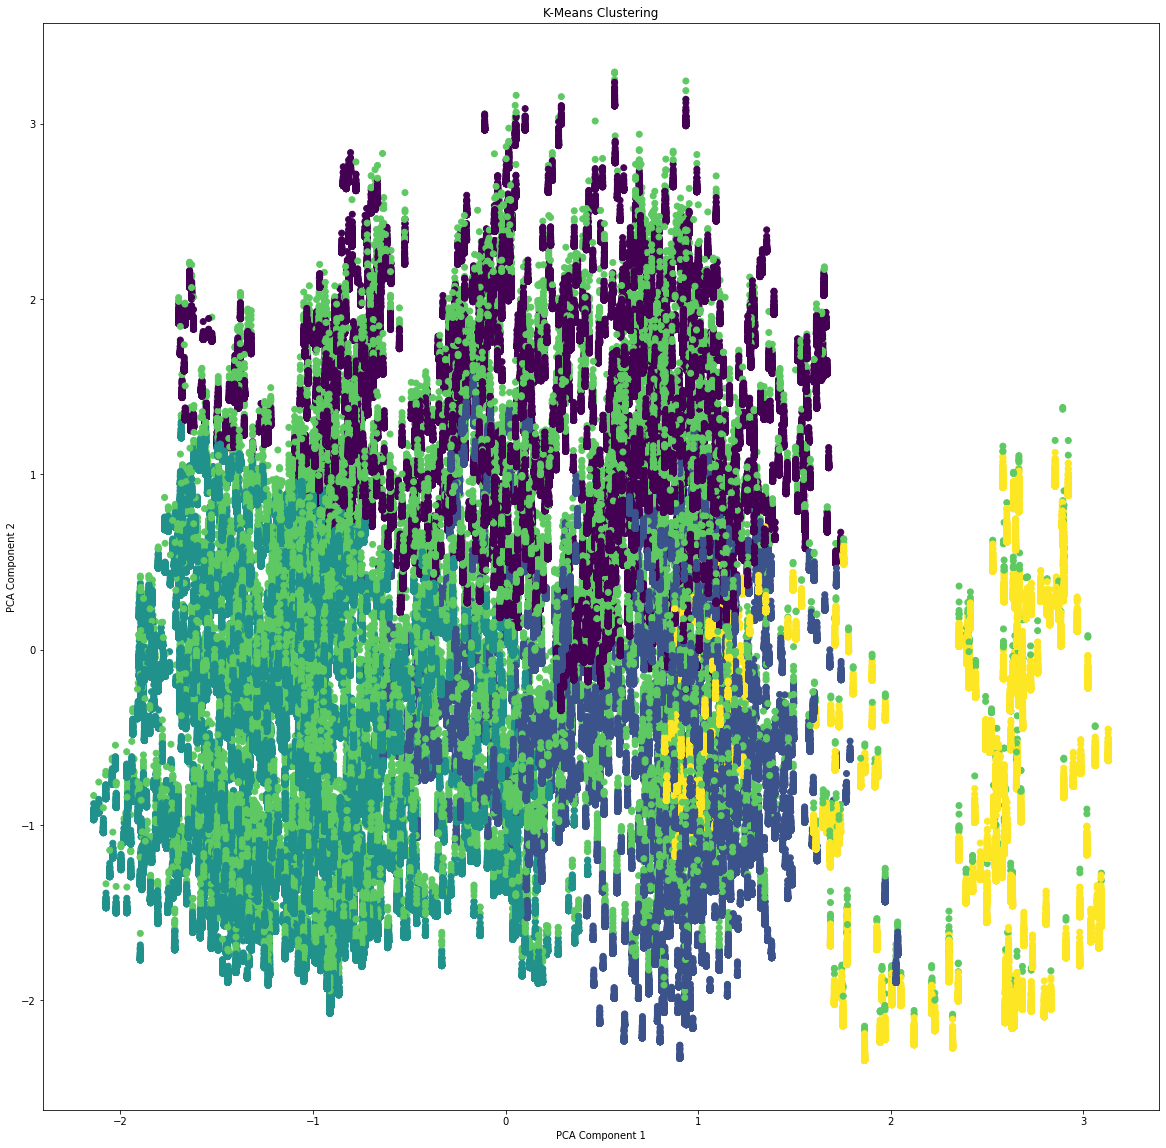

In [244]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to two dimensions using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

# Create scatter plot of the data
plt.figure(figsize=(20,20))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering')
plt.show()

In [212]:
# Cant do clustering.
We stopped here. will get back later. toodaloo

SyntaxError: invalid syntax (2727667210.py, line 2)

In [252]:
data
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

# Data Splitting

In [255]:
# Split into features (X) and target variable (y)
X = data.drop('Weekly_Sales', axis=1)  # features
y = data['Weekly_Sales']  # target variable

In [256]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are the training sets
# X_test and y_test are the testing sets

# Normalized data

In [223]:

from sklearn.preprocessing import StandardScaler

# Select the numerical features to be normalized
num_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
data[num_features] = scaler.fit_transform(data[num_features])

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Type          421570 non-null  int64         
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

# Model Selection:

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create instances of regression models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gb_reg = GradientBoostingRegressor()


# Model Training:

In [258]:
# Train the model on the training set
lin_reg.fit(X_train, y_train)
# tree_reg.fit(X_train, y_train)
# rf_reg.fit(X_train, y_train)
# gb_reg.fit(X_train, y_train)

TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[int64]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.